# Observations

1. Most tweets from the different media sources are neutral.
2. The CBS News and Fox news overall tends to tweet more negatively.
3. BBC, NY Times, and CNN tends to tweet more positively.


In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target Accounts BBC, CBS, CNN, Fox, and New York times.
target_users = ['@BBC', '@CBSNEWS', '@CNN', '@FOXNEWS', '@NYTIMES']


# Variables for holding sentiments
sentiments = []


for user in target_users:
# Loop through 5 pages of tweets (total 100 tweets)
    oldest_tweet = None
    counter = 1
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, max_id = oldest_tweet)

        # Loop through all tweets 
        for tweet in public_tweets:
           
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago = counter

            # Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet['id'] - 1

            # Add sentiments for each tweet into a list
            sentiments.append({"Date": tweet["created_at"],
                               "News Outlet" : user,
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter,
                              })

            # Add to counter 
            counter += 1

In [13]:
#create sentiment datframe
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd = sentiments_pd[["News Outlet" , "Date", "Compound", "Positive", "Neutral", "Negative", "Tweets Ago"]]
sentiments_pd.head()

,News Outlet,Date,Compound,Positive,Neutral,Negative,Tweets Ago
0,@BBC,Sat Jun 09 15:02:02 +0000 2018,-0.7783,0.000,0.327,0.673,1
1,@BBC,Sat Jun 09 14:04:02 +0000 2018,0.7717,0.528,0.000,0.472,2
2,@BBC,Sat Jun 09 13:24:03 +0000 2018,0.0000,0.000,0.000,1.000,3
3,@BBC,Sat Jun 09 13:03:06 +0000 2018,0.0000,0.000,0.000,1.000,4
4,@BBC,Sat Jun 09 12:23:25 +0000 2018,0.0000,0.000,0.000,1.000,5


In [4]:
# create dataframes for each media source
bbc_df = sentiments_pd.loc[(sentiments_pd["News Outlet"] == "@BBC")]
cbs_df =  sentiments_pd.loc[(sentiments_pd["News Outlet"] == "@CBSNEWS")]
cnn_df =  sentiments_pd.loc[(sentiments_pd["News Outlet"] == "@CNN")]
fox_df = sentiments_pd.loc[(sentiments_pd["News Outlet"] == "@FOXNEWS")]
nytimes_df =  sentiments_pd.loc[(sentiments_pd["News Outlet"] == "@NYTIMES")]

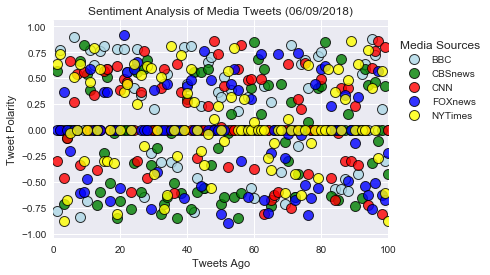

In [12]:
#Import Seaborn
import seaborn as sns
sns.set()
# set x and y axis to plot each media source. This will allow colors and labels to be set specifically for each media source
x_bbc = bbc_df["Tweets Ago"]
y_bbc = bbc_df["Compound"]

x_cbs = cbs_df["Tweets Ago"]
y_cbs = cbs_df["Compound"]

x_cnn = cnn_df["Tweets Ago"]
y_cnn = cnn_df["Compound"]

x_fox = fox_df["Tweets Ago"]
y_fox = fox_df["Compound"]

x_nytimes = nytimes_df["Tweets Ago"]
y_nytimes = nytimes_df["Compound"]

plt.scatter(x_bbc, y_bbc, c='lightblue', s=100, label= 'BBC',  marker="o", alpha=0.8, edgecolor = "black", linewidths=1)
plt.scatter(x_cbs, y_cbs, c='green', s=100, label= 'CBSnews', marker="o", alpha=0.8, edgecolor = "black", linewidths=1)
plt.scatter(x_cnn, y_cnn, c='red', s=100, label= 'CNN', marker="o", alpha=0.8, edgecolor = "black", linewidths=1)
plt.scatter(x_fox, y_fox, c='blue', s=100, label= 'FOXnews', marker="o", alpha=0.8, edgecolor = "black", linewidths=1)
plt.scatter(x_nytimes, y_nytimes, s=100, c='yellow', label= 'NYTimes', marker="o", alpha=0.8, edgecolor = "black", linewidths=1)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%m/%d/%Y")
plt.title(f"Sentiment Analysis of Media Tweets ({now})")
plt.xlim([0,100])
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
# format the legend
plt.legend(bbox_to_anchor=(1.3,.5), loc="lower right", title="Media Sources")
plt.savefig("Sentiment_Analysis_of_Media_Tweets")
plt.show()
                               

In [11]:
# Split up our data into groups based upon news outlet
media_df = sentiments_pd.groupby('News Outlet')

# Find average overall sentiment for each news outlet
media_sentiment = media_df['Compound'].mean()


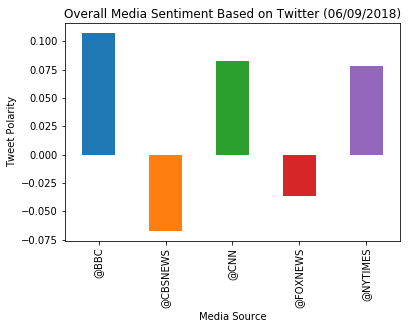

In [10]:
now = datetime.now()
now = now.strftime("%m/%d/%Y")
media_chart = media_sentiment.plot(kind="bar",)
media_chart.set_xlabel("Media Source")
media_chart.set_ylabel("Tweet Polarity")
plt.title(f"Overall Media Sentiment Based on Twitter ({now})")
# Save an image of the chart and print it to the screen
plt.savefig("Overall_Media_Sentiment.png")
plt.show()